In [8]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import *

# This is the initial select one file.
# To do multiple files, we can do a loop to select ask to select the files, add the files in a list, and concat the dataframe.

root = tk.Tk()
root.withdraw()
check = False
while check == False:
    # Try to ensure the user does not select anything other than a number
    try:
        num = input("How many files do you want to upload (select between 1-5)?")
        num=int(num)
        if (num > 0) & (num <= 5):
            num = int(num)
            kf=[]
            for i in range(num):
                root = tk.Tk()
                root.withdraw()
                root.wm_attributes('-topmost',True)
                file_path = filedialog.askopenfilename(parent=root)
                file_path
                kf.append(pd.read_csv(file_path, delimiter="\t",skiprows= 6))
            df = pd.concat(kf, ignore_index=True)
            break
        else:
            root.wm_attributes('-topmost',True)
            messagebox.showinfo('Error','Value needs to be between 1 and 5')
    except (ValueError, TypeError):
        root.wm_attributes('-topmost',True)
        messagebox.showinfo('Error','Value needs to be between 1 and 5')
        check = True

2023-06-07 22:37:47.605 Python[52202:3780563] +[CATransaction synchronize] called within transaction
2023-06-07 22:37:47.622 Python[52202:3780563] +[CATransaction synchronize] called within transaction
2023-06-07 22:37:59.159 Python[52202:3780563] +[CATransaction synchronize] called within transaction
2023-06-07 22:37:59.267 Python[52202:3780563] +[CATransaction synchronize] called within transaction
2023-06-07 22:37:59.367 Python[52202:3780563] +[CATransaction synchronize] called within transaction
2023-06-07 22:37:59.518 Python[52202:3780563] +[CATransaction synchronize] called within transaction
2023-06-07 22:37:59.617 Python[52202:3780563] +[CATransaction synchronize] called within transaction
2023-06-07 22:37:59.618 Python[52202:3780563] Warning: Window move completed without beginning
2023-06-07 22:38:01.049 Python[52202:3780563] +[CATransaction synchronize] called within transaction
2023-06-07 22:38:01.152 Python[52202:3780563] +[CATransaction synchronize] called within transact

,Date,Time,Dec. Sec.,Speed (RPM),CMD Speed (RPM),Main Temp (Deg F),Reservoir Temp (Deg F),Ambient Temp (Deg F),VFD Power,Main Pres. (psi),Cl Pres. (psi),Ch Pres (psi),Reservoir Level (0 to 100%),M Temp (F),Second Reservoir Temp (F),UP Res Level (%),VFD Power SMA20
0,2022/09/20,07:59:16,0.8,200.12,200.1,72.49,70.31,70.54,1.17,1005.57,1279.79,1012.15,58.01,73.97,72.41,62.08,1.05
1,2022/09/20,07:59:17,0.0,200.12,200.1,72.53,70.30,70.53,1.06,1008.12,1280.19,994.64,57.99,74.12,72.48,62.10,1.06
2,2022/09/20,07:59:17,0.2,200.12,200.1,72.53,70.30,70.53,1.13,1008.12,1280.19,994.64,57.99,74.12,72.48,62.10,1.05
3,2022/09/20,07:59:17,0.4,200.12,200.1,72.53,70.30,70.53,1.05,1008.12,1280.19,994.64,57.99,74.12,72.48,62.10,1.05
4,2022/09/20,07:59:17,0.6,200.12,200.1,72.53,70.30,70.53,1.01,1008.12,1280.19,994.64,57.99,74.12,72.48,62.10,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808823,2022/09/24,12:28:45,0.0,-0.23,0.0,73.42,68.75,73.75,0.04,2.30,1414.79,4.06,74.48,77.33,72.12,68.98,0.04
1808824,2022/09/24,12:28:45,0.2,-0.23,0.0,73.42,68.75,73.75,0.04,2.30,1414.79,4.06,74.48,77.33,72.12,68.98,0.04
1808825,2022/09/24,12:28:45,0.4,-0.23,0.0,73.42,68.75,73.75,0.04,2.30,1414.79,4.06,74.48,77.33,72.12,68.98,0.04
1808826,2022/09/24,12:28:45,0.6,-0.24,0.0,73.43,68.78,73.78,0.03,2.29,1414.79,2.77,74.48,77.33,72.13,68.97,0.04


In [13]:
# Making a column to combine date and time
df.insert(2, 'Datetime', df['Date']+ ' '+ df['Time'])

# T conversion
x = 11.758 
y = 0.737561
z = 9550

# From Data
a = df['VFD Power SMA20'] 
b = df['Speed (RPM)'] 

c = a*x # KW
tv = round((c*z) / (b*y), 2)

# Adding T column
df['T Value'] = tv

# Cleaning the data of outliers 
df = df[((df['Speed (RPM)'] >= 80) & (df['Speed (RPM)'] < 201))
        & (df['T Value']<=2000)]

df = df.sort_values(by=['Datetime'], ascending=True)

In [14]:
df.describe()

,Dec. Sec.,Speed (RPM),CMD Speed (RPM),Main Temp (Deg F),Reservoir Temp (Deg F),Ambient Temp (Deg F),VFD Power,Main Pres. (psi),Cl Pres. (psi),Ch Pres (psi),Reservoir Level (0 to 100%),M Temp (F),Second Reservoir Temp (F),UP Res Level (%),VFD Power SMA20,T Value
count,1.803700e+06,1.803700e+06,1.803700e+06,1.803700e+06,1.803700e+06,1.803700e+06,1.803700e+06,1.803700e+06,1.803700e+06,1.803700e+06,1.803700e+06,1.803700e+06,1.803700e+06,1.803700e+06,1.803700e+06,1.803700e+06
mean,4.440473e-01,2.000807e+02,2.000742e+02,7.231462e+01,6.870355e+01,7.282663e+01,7.563172e-01,1.008094e+03,1.378047e+03,1.004229e+03,6.611895e+01,7.661634e+01,7.206908e+01,7.484623e+01,7.563248e-01,5.754972e+02
std,2.871666e-01,1.207364e+00,1.553520e+00,2.302283e-01,5.031283e-01,1.855459e+00,1.539944e-01,1.185049e+01,3.746724e+01,1.869110e+01,6.824758e+00,9.366600e-01,1.236336e+00,5.641974e+00,1.430436e-01,1.087768e+02
min,0.000000e+00,8.052000e+01,5.000000e+01,7.166000e+01,6.745000e+01,6.930000e+01,1.600000e-01,9.551200e+02,1.271450e+03,9.281200e+02,5.568000e+01,7.397000e+01,6.700000e+01,5.922000e+01,3.300000e-01,3.194100e+02
25%,2.000000e-01,2.000600e+02,2.001000e+02,7.213000e+01,6.836000e+01,7.166000e+01,6.500000e-01,1.000390e+03,1.352450e+03,9.911500e+02,5.842000e+01,7.592000e+01,7.132000e+01,7.106000e+01,6.700000e-01,5.097600e+02
50%,4.000000e-01,2.001100e+02,2.001000e+02,7.229000e+01,6.862000e+01,7.219000e+01,7.400000e-01,1.006990e+03,1.380020e+03,1.003050e+03,6.656000e+01,7.646000e+01,7.219000e+01,7.495000e+01,7.400000e-01,5.629400e+02
75%,7.000000e-01,2.001400e+02,2.001000e+02,7.249000e+01,6.894000e+01,7.395000e+01,8.600000e-01,1.014070e+03,1.405630e+03,1.016310e+03,7.299000e+01,7.732000e+01,7.294000e+01,8.011000e+01,8.500000e-01,6.466500e+02
max,9.000000e-01,2.009000e+02,2.001000e+02,7.336000e+01,7.154000e+01,8.050000e+01,3.410000e+00,1.094530e+03,1.468890e+03,1.103830e+03,7.773000e+01,7.905000e+01,7.616000e+01,9.928000e+01,2.580000e+00,1.958260e+03


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1803700 entries, 0 to 1803732
Data columns (total 19 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Date                         object 
 1   Time                         object 
 2   Datetime                     object 
 3   Dec. Sec.                    float64
 4   Speed (RPM)                  float64
 5   CMD Speed (RPM)              float64
 6   Main Temp (Deg F)            float64
 7   Reservoir Temp (Deg F)       float64
 8   Ambient Temp (Deg F)         float64
 9   VFD Power                    float64
 10  Main Pres. (psi)             float64
 11  Cl Pres. (psi)               float64
 12  Ch Pres (psi)                float64
 13  Reservoir Level (0 to 100%)  float64
 14  M Temp (F)                   float64
 15  Second Reservoir Temp (F)    float64
 16  UP Res Level (%)             float64
 17  VFD Power SMA20              float64
 18  T Value                      float64
dtypes: fl

In [16]:
# Chart title
ctitle = 'Case Study 3'
# Creating a list of columns to easier assign values with index vs attributes
colnames = list(df.columns)
# Common x-axis
mainx = colnames[2]
# Label for x-axis
xlab = 'Date and Time'


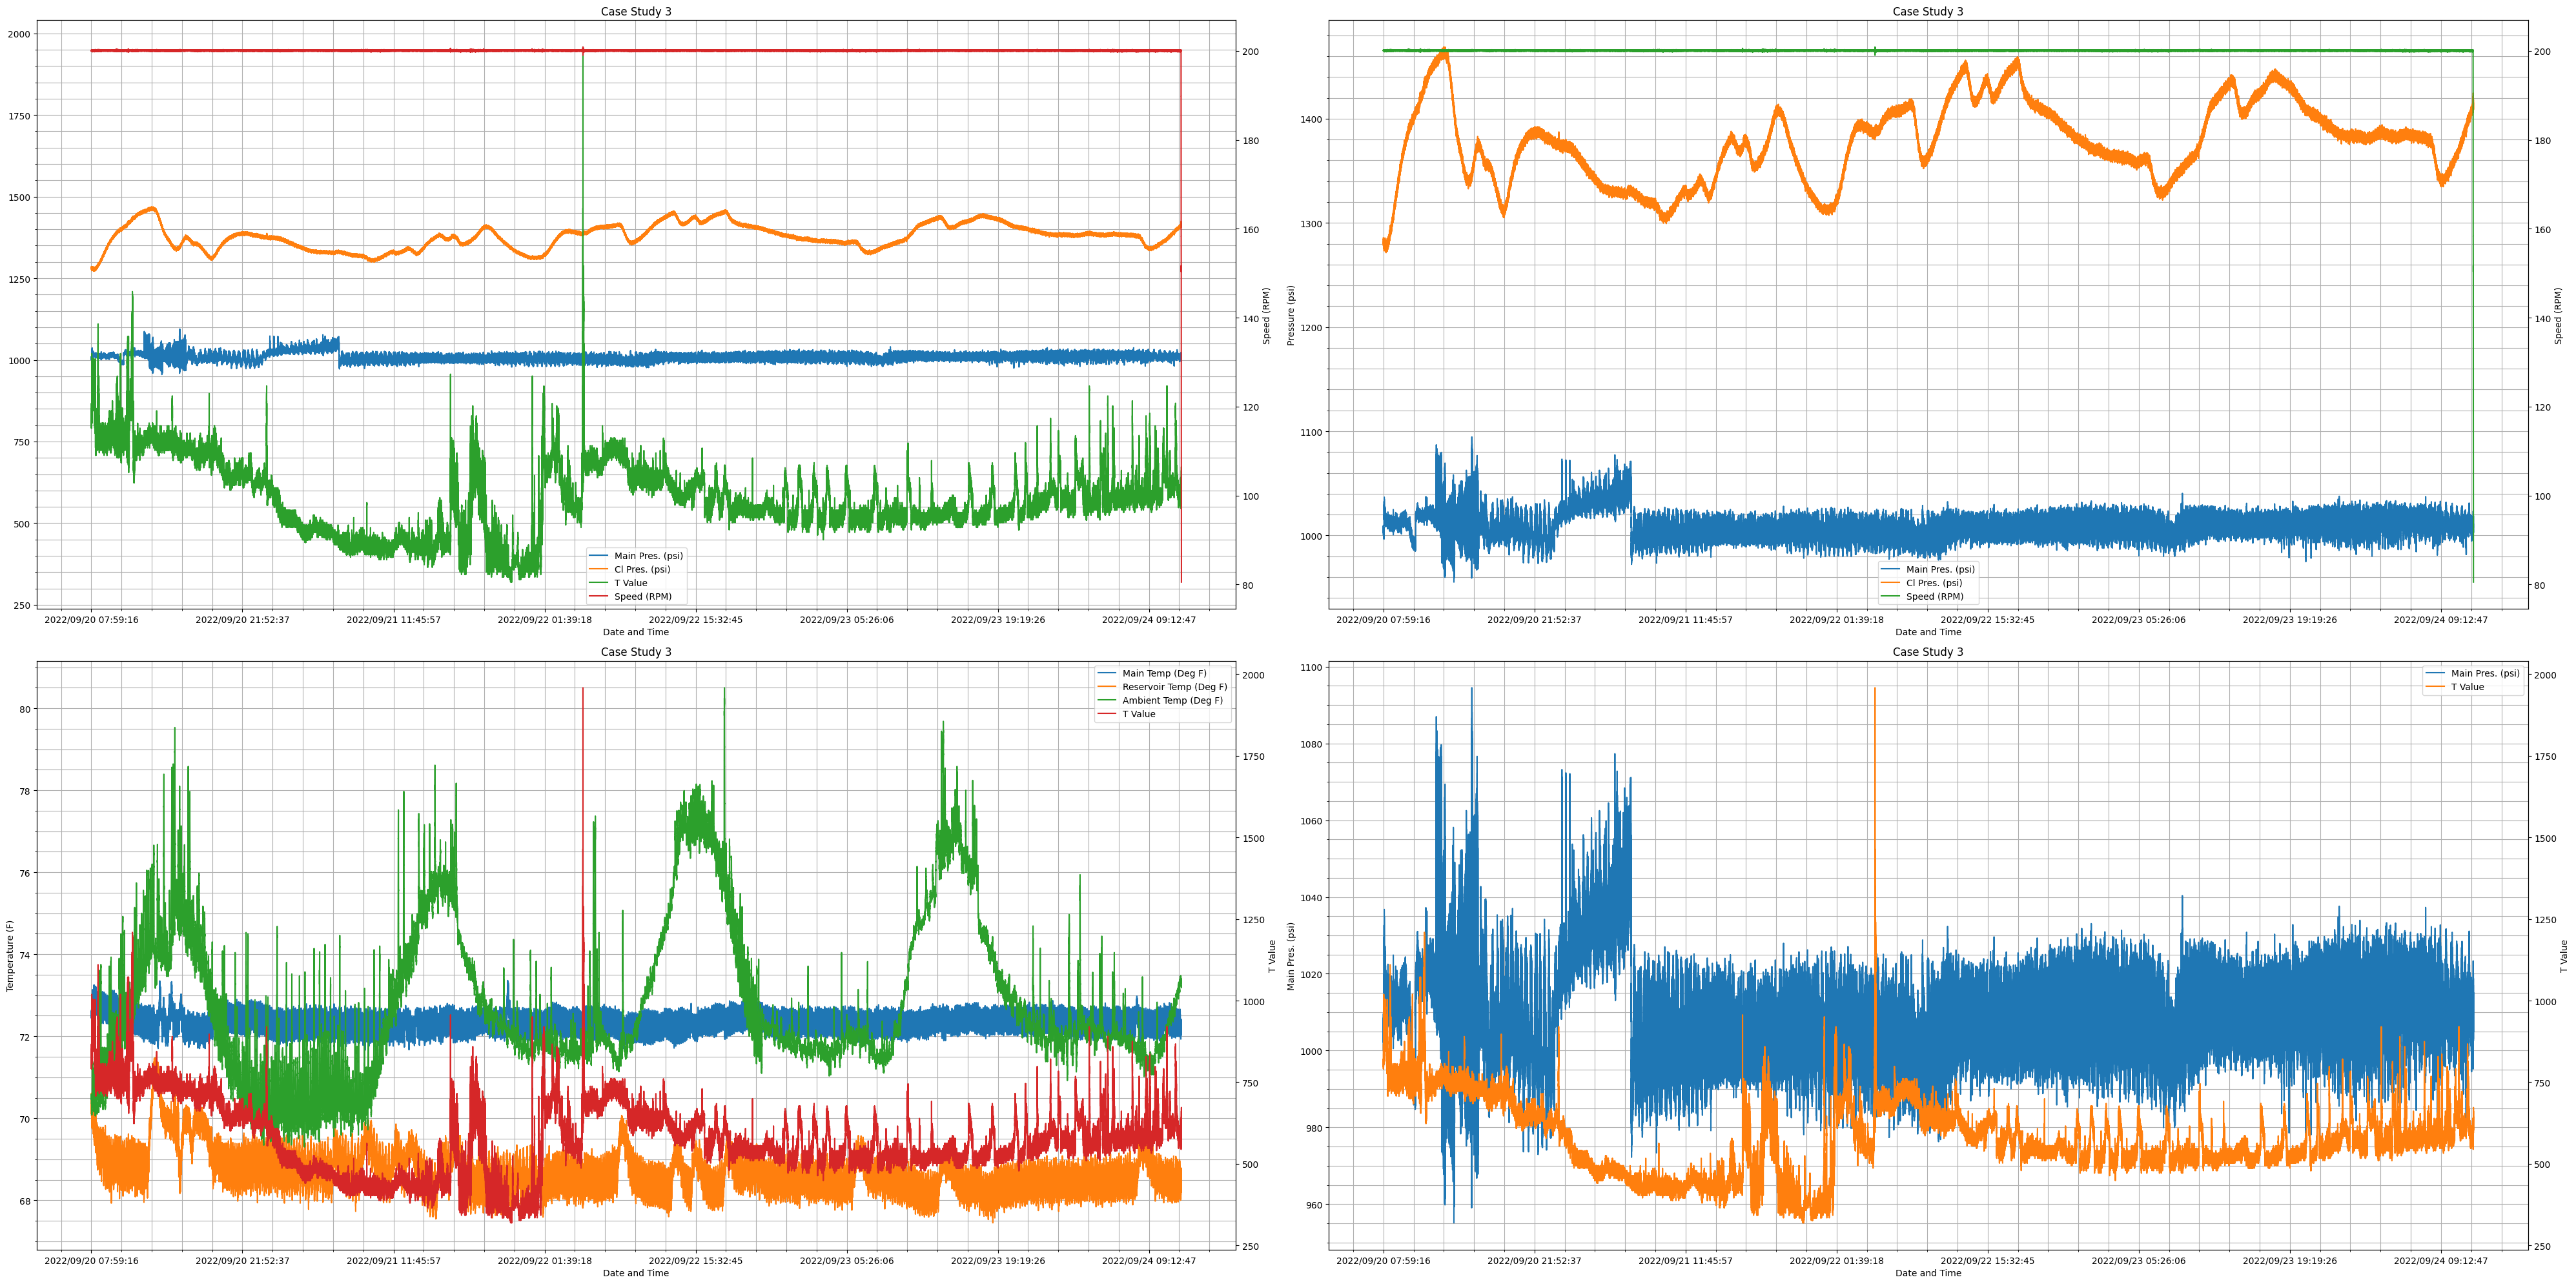

In [17]:
# Making 1 fig but splitting to 4 sections
fig, (ax) = plt.subplots(2,2, figsize = (40,20))

# Key plots: pressure, Torque, RPM
mx = df.plot(ax=ax[0,0], x = mainx, y= colnames[10], legend = False)
mx = df.plot(ax=mx, x = mainx, y = colnames[11], legend=False)
mx = df.plot(ax=mx, x = mainx, y = colnames[len(colnames)-1], legend=False)
mx2 = df.plot(ax=mx, x = mainx, y = colnames[4], ylabel = colnames[4],secondary_y=True, legend = False, mark_right=False)

h1, l1 = mx.get_legend_handles_labels()
h2, l2 = mx2.get_legend_handles_labels()

plt.title(ctitle)
mx.minorticks_on()
mx.grid(which = 'both')
mx.set_xlabel(xlab)
plt.tight_layout()
mx.legend(h1+h2, l1+l2, loc='lower center')




# Plot pressure vs rpm
px = df.plot(ax = ax[0,1],x = mainx, y = colnames[10], legend = False)
px = df.plot(ax = px, x = mainx, y = colnames[11], legend = False, ylabel='Pressure (psi)')
px2= df.plot(ax = px, x = mainx, secondary_y=True , y=colnames[4], legend = False, mark_right = False, ylabel = colnames[4])

h1, l1 = px.get_legend_handles_labels()
h2, l2 = px2.get_legend_handles_labels()

plt.title(ctitle)
px.minorticks_on()
px.grid(which = 'both')
px.set_xlabel(xlab)
plt.tight_layout()
px.legend(h1+h2, l1+l2, loc='lower center')


# Plot temperature vs tq
tx = df.plot(ax = ax[1,0],x = mainx, y = colnames[6], legend = False, ylabel = 'Temperature (F)')
tx = df.plot(ax = tx, x = mainx, y = colnames[7], legend = False)
tx = df.plot(ax = tx,x = mainx, y = colnames[8], legend = False)
tx2= df.plot(ax = tx, x = mainx, secondary_y=True , y=colnames[len(colnames)-1], legend = False, mark_right = False, ylabel = colnames[len(colnames)-1])

h1, l1 = tx.get_legend_handles_labels()
h2, l2 = tx2.get_legend_handles_labels()

plt.title(ctitle)
tx.minorticks_on()
tx.grid(which = 'both')
tx.set_xlabel(xlab)
plt.tight_layout()
tx.legend(h1+h2, l1+l2, loc='best')

# Plot T value vs press
tqx = df.plot(ax = ax[1,1],x = mainx, y = colnames[10], legend = False, ylabel=colnames[10])
tqx2= df.plot(ax = tqx, x = mainx, secondary_y=True , y=colnames[len(colnames)-1], legend = False, mark_right = False, ylabel = colnames[len(colnames)-1])

h1, l1 = tqx.get_legend_handles_labels()
h2, l2 = tqx2.get_legend_handles_labels()

plt.title(ctitle)
tqx.minorticks_on()
tqx.grid(which = 'both')
tqx.set_xlabel(xlab)
plt.tight_layout()
tqx.legend(h1+h2, l1+l2, loc='best')


plt.show()